## Cargar Paquetes necesarios

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Cargar Dataset

In [2]:
data = pd.read_excel('Colombia-Feb21.xlsx', engine='openpyxl')


## Creación de una función para corregir errores de acentos por la codificación.

In [3]:
acentos = {
    'AndalucÃ­a':'Andalucía',
    'AtlÃ¡ntico':'Atlántico',
    'BogotÃ¡':'Bogotá',
    'BoyacÃ¡':'Boyacá',
    'CanadÃ¡':'Canadá',
    'ChÃ­a':'Chía',
    'CÃºcuta':'Cúcuta',
    'GarzÃ³n':'Garzón',
    'IbaguÃ©':'Ibagué',
    'ItagÃ¼Ã':'Itagüí',
    'MedellÃ­n':'Medellín',
    'MÃ©xico':'México',
    'PanamÃ¡':'Panamá',
    'PerÃº':'Perú',
    'PopayÃ¡n':'Popayán',
    'SopÃ³':'Sopó',
    'TuluÃ¡':'Tuluá',
    'UsaquÃ©n':'Usaquén'
}

def decode(string):
    text = string
    for key in acentos:
        text = text.replace(key,acentos[key])
    return text


## Preprocesamiento de datos.

In [4]:
#Arreglar acentos en los nombres
data['Headquarters Location'] = [decode(name) for name in data['Headquarters Location']]
#Eliminar columna de URL 
data = data.drop(['Organization Name URL'],axis=1)
#Eliminar NaN en las columnas de estudio
data_nonan = data[['Founded Date','Headquarters Location','Last Equity Funding Amount Currency (in USD)']].dropna()
data = pd.merge(left=data.drop(['Founded Date','Headquarters Location','Last Equity Funding Amount Currency (in USD)'],axis=1),
                right=data_nonan,left_index=True,right_index=True,how='right')
#Eliminar fila de nombre de ciudad con URL y filas con fechas erroneas
for i in range(len(data)-1,-1,-1):
    fecha = data['Founded Date'].iloc[i]
    name = data['Headquarters Location'].iloc[i]
    if name.count('http'):
        data = data.drop([i],axis=0)
    elif not isinstance(fecha,datetime.datetime):
        data = data.drop([i],axis=0)

## Top 20 de ciudades por concentración de empresas.

In [5]:
#Agrupar dataframe por nombres de ciudades
data_2 = data[['Headquarters Location','Organization Name']].groupby(['Headquarters Location']).count()
#Organizar dataframe
data_2 = data_2.sort_values(['Organization Name'],ascending=False)
data_2.columns = ['Concentration of companies']
data_2.head(20)

,Concentration of companies
Headquarters Location,
"Bogotá, Distrito Especial, Colombia",144
"Medellín, Antioquia, Colombia",34
"Cali, Valle del Cauca, Colombia",5
"Barranquilla, Atlantico, Colombia",2
"Montenegro, Quindio, Colombia",1
"Valledupar, Cesar, Colombia",1
"Usaquén, Distrito Especial, Colombia",1
"Santiago De Cali, Valle del Cauca, Colombia",1
"Rionegro, Antioquia, Colombia",1


## Distribución de cuidades por capital levantado.

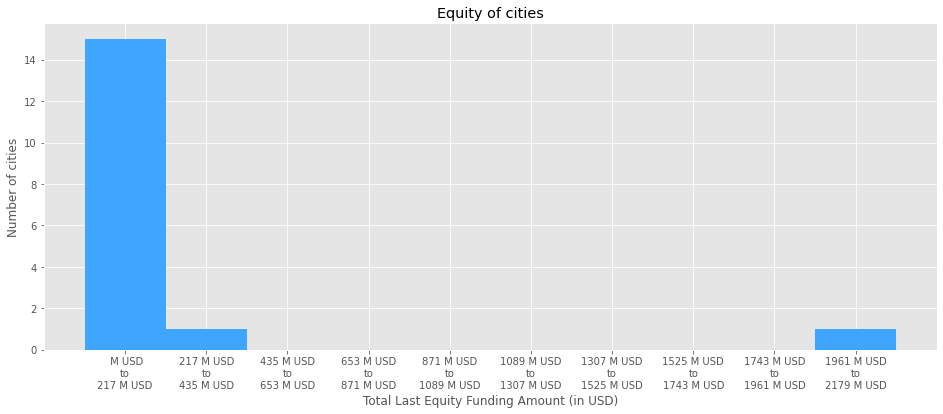

In [6]:
fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
#Agrupar DataFrame por ciudades y obtener la suma de su capital
data_3 = data.groupby(['Headquarters Location']).sum()
#Histograma de el capital levantado
n, bins, patches = plt.hist(data_3['Last Equity Funding Amount Currency (in USD)'],color='#40A5FF')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{}\nto\n{}".format(str(value)[:-8]+' M USD' if value != 0 else '0 M USD', str(bins[idx+1])[:-8]+' M USD') for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks,labels=xticks_labels)
plt.xlabel('Total Last Equity Funding Amount (in USD)')
plt.ylabel('Number of cities')
plt.title('Equity of cities')
plt.show()

## Distribución de ciudades por capital levantado por año.

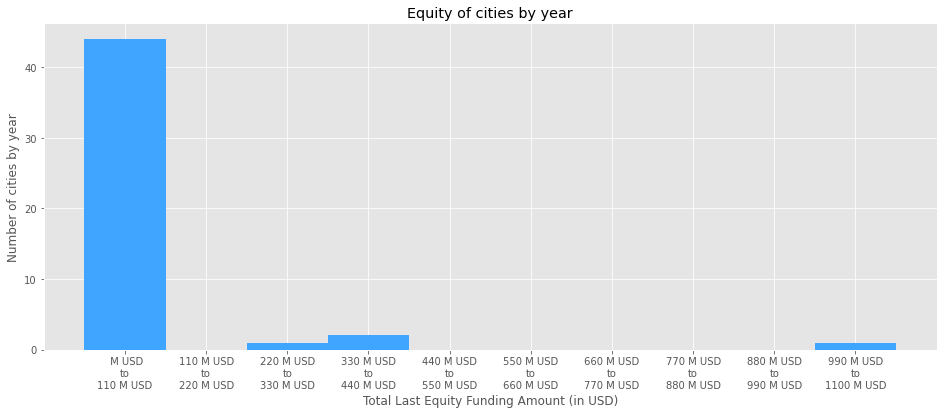

In [7]:
# Nueva Columna con la información de el año.
data['Year'] = [fecha.year for fecha in data['Founded Date']]

fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
# Agrupar por nombre de ciudad y año.
data_4 = data.groupby(['Headquarters Location','Year']).sum()
# Histograma de el capital levantado.
n, bins, patches = plt.hist(data_4['Last Equity Funding Amount Currency (in USD)'],color='#40A5FF')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{}\nto\n{}".format(str(value)[:-8]+' M USD' if value != 0 else '0 M USD', str(bins[idx+1])[:-8]+' M USD') for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks,labels=xticks_labels)
plt.xlabel('Total Last Equity Funding Amount (in USD)')
plt.ylabel('Number of cities by year')
plt.title('Equity of cities by year')
plt.show()

## Distribución de ciudades por capital levantado por sector.

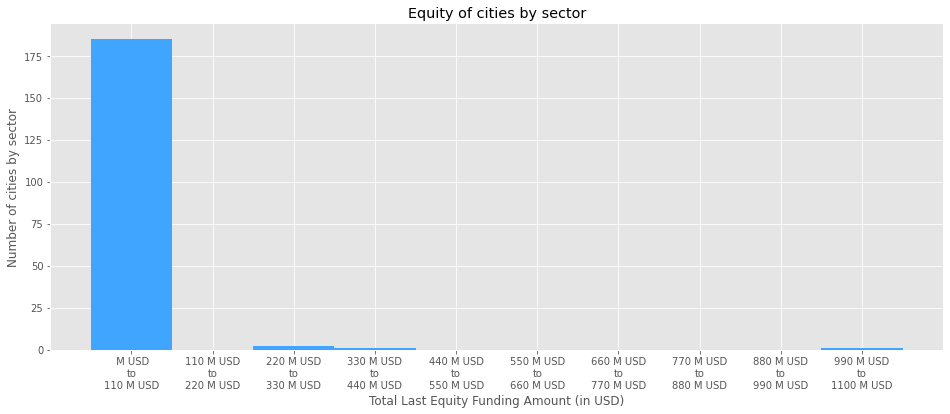

In [8]:
fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
#Agrupar por nombre de ciudad y sector.
data_5 = data.groupby(['Headquarters Location','Industries']).sum()
#Histograma de el capital levantado.
n, bins, patches = plt.hist(data_5['Last Equity Funding Amount Currency (in USD)'],color='#40A5FF')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{}\nto\n{}".format(str(value)[:-8]+' M USD' if value != 0 else '0 M USD', str(bins[idx+1])[:-8]+' M USD') for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks,labels=xticks_labels)
plt.xlabel('Total Last Equity Funding Amount (in USD)')
plt.ylabel('Number of cities by sector')
plt.title('Equity of cities by sector')
plt.show()

## Sectores con mayor inversión de capital.

In [9]:
#Agrupar por sector, y rescatar columna de capital levantado.
data_6 = data[['Industries','Last Equity Funding Amount Currency (in USD)']].groupby(['Industries']).sum()
#Organizar el Dataset nuevo.
data_6 = data_6.sort_values(['Last Equity Funding Amount Currency (in USD)'],ascending=False)
data_6.columns = ['Invested equity']
data_6.head()


,Invested equity
Industries,
Oil and Gas,1.100000e+09
"Air Transportation, Loyalty Programs, Public Transportation",3.437000e+08
"Consumer Goods, E-Commerce, Food Delivery",3.000000e+08
Financial Services,2.492000e+08
"Energy, Energy Efficiency, Oil and Gas, Renewable Energy",1.000000e+08


## 15 rondas de financiación más grandes por año.

In [10]:
#Lista de los años sin repetición.
years = list(data['Year'].drop_duplicates().sort_values(ascending=False))
#Crear nuevo DataFrame con bloques de a 15 o menos capital levantado por año iterado.
data_7 = data[data['Year'] == years[0]].sort_values(['Last Equity Funding Amount Currency (in USD)'],ascending=False).head(15)
data_7 = data_7[['Year','Organization Name','Industries','Headquarters Location','Last Equity Funding Amount Currency (in USD)']]
for year in years[1:]:
    data_year = data[data['Year'] == year].sort_values(['Last Equity Funding Amount Currency (in USD)'],ascending=False).head(15)
    data_year = data_year[['Year','Organization Name','Industries','Headquarters Location','Last Equity Funding Amount Currency (in USD)']]
    data_7 = pd.concat([data_7,data_year])
#Mostrar DataFrame
data_7

,Year,Organization Name,Industries,Headquarters Location,Last Equity Funding Amount Currency (in USD)
10,2021,Cubbo,"B2B, Logistics, Real Estate","Bogotá, Distrito Especial, Colombia",2.000000e+06
13,2020,Tul,"Building Material, Construction, E-Commerce, H...","Bogotá, Distrito Especial, Colombia",4.000000e+06
152,2020,Melonn,NaN,"Medellín, Antioquia, Colombia",2.200000e+06
59,2020,Cobre,Financial Services,"Bogotá, Distrito Especial, Colombia",1.200000e+06
32,2020,ontop,"Human Resources, SaaS","Bogotá, Distrito Especial, Colombia",1.000000e+06
...,...,...,...,...,...
71,2006,Telemetrik,"Industrial, Internet of Things, Marketing Auto...","Medellín, Antioquia, Colombia",4.206750e+05
178,2005,DATELLIGENCE,"Cloud Data Services, Data Mining, Data Visuali...","Bogotá, Distrito Especial, Colombia",3.250000e+05
83,2003,Credivalores-Crediservicios,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",3.400000e+07
315,2001,ZEturf,"Information Services, Racing","Cali, Valle del Cauca, Colombia",1.137547e+07
